In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [5]:
data = pd.read_csv('User_Data.csv')
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [21]:
data['Gender']=data['Gender'].replace({'Male':0 ,'Female':1})

In [22]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0
...,...,...,...,...,...
395,15691863,1,46,41000,1
396,15706071,0,51,23000,1
397,15654296,1,50,20000,1
398,15755018,0,36,33000,0


In [24]:
data.drop(['User ID'],inplace= True,axis=1)

In [25]:
data

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
...,...,...,...,...
395,1,46,41000,1
396,0,51,23000,1
397,1,50,20000,1
398,0,36,33000,0


In [53]:
data_x = data.iloc[:,:-1].values

y = data.iloc[:,-1].values


In [49]:
from sklearn.preprocessing import scale

In [54]:
x = scale(data_x)
print(x)

[[-1.02020406 -1.78179743 -1.49004624]
 [-1.02020406 -0.25358736 -1.46068138]
 [ 0.98019606 -1.11320552 -0.78528968]
 ...
 [ 0.98019606  1.17910958 -1.46068138]
 [-1.02020406 -0.15807423 -1.07893824]
 [ 0.98019606  1.08359645 -0.99084367]]


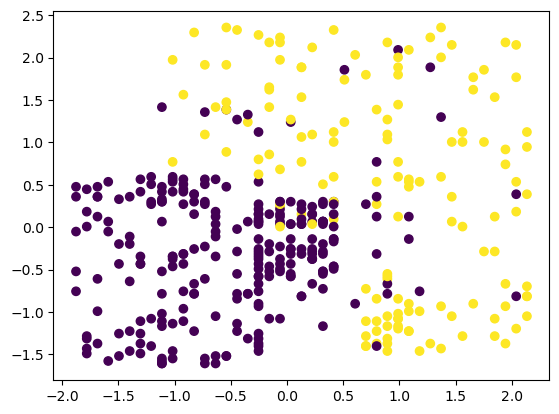

In [58]:
plt.scatter (x[:,1],x[:,2],c = y)
plt.show()

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [68]:
knn = KNeighborsClassifier(n_neighbors=5 , metric='minkowski',p=1)
knn.fit(x_train,y_train)


KNeighborsClassifier(p=1)

In [72]:
y_pred =knn.predict(x_test)

In [70]:
print(knn.score(x_test,y_test))
print(knn.score(x_train,y_train))

0.9166666666666666
0.9


In [71]:
from sklearn.metrics import roc_curve ,auc

In [73]:
fbr , tpr , thresholds = roc_curve(y_test , y_pred)

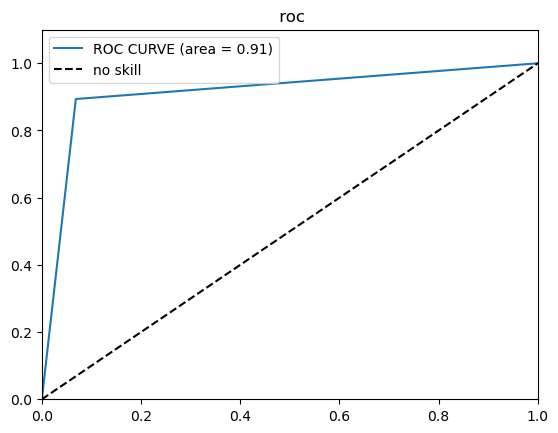

In [74]:
plt.figure()
roc_curbe=auc(fbr,tpr)
plt.plot(fbr,tpr , label='ROC CURVE (area = %0.2f)'%roc_curbe)
plt.margins(0.5)
plt.plot([0,1],[0,1],"k--",label="no skill")
plt.xlim([0.0,1.0])
plt.ylim([0.0 , 1.1])
plt.title(' roc')
plt.legend()
plt.show()